## Abiotic consumer-resource model
In this notebook, I will perform the quasi-stationary approximation of a consumer-resource model with one species and one resource under abiotic conditions. Additionally, I will compare and validate the analytical results obtained through this approximation with numerical simulations.

I have derived the quasi-stationary approximation equation for the consumer-resource model in a separate Mathematica notebook, with the following result:

<img src="img.png" style="height:80px" />

$$
\text{Nx}(t)\to \frac{\gamma  \text{$\mu $max} e^{t (c \gamma  \text{ks}+d)-c \gamma  \text{ks} t-d t}}{c \gamma  \text{ks}+d}+c_1 e^{-c \gamma  \text{ks} t-d t}
$$

### Numerical solution and some interesting behaviours

Let's break down the physical meaning of each parameter:

1. c: represents the efficiency of the <span style="color: blue;">uptake rate</span>, it indicates how effectively the consumer species converts the available resources into its own biomass or energy.

2. Mu_max: this parameter represents the <span style="color: blue;">maximum specific growth rate</span>
 of the microorganisms (e.g., bacteria) . It is a measure of how quickly the microorganisms can reproduce when resources are not limiting.

3. k_s: this is the <span style="color: blue;">half-saturation constant</span>
, and it represents the nutrient concentration at which the growth rate is half-maxima.

4. $\gamma$: this parameter often represents the yield coefficient, describing the number of units of nutrient that are consumed to produce one bacterium (divided by the volume).

5. d: the parameter d represents the <span style="color: blue;">death rate </span>of the microorganisms.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

##### high death rate, low $\mu$ and ks
Both population and the resource oscillate in time

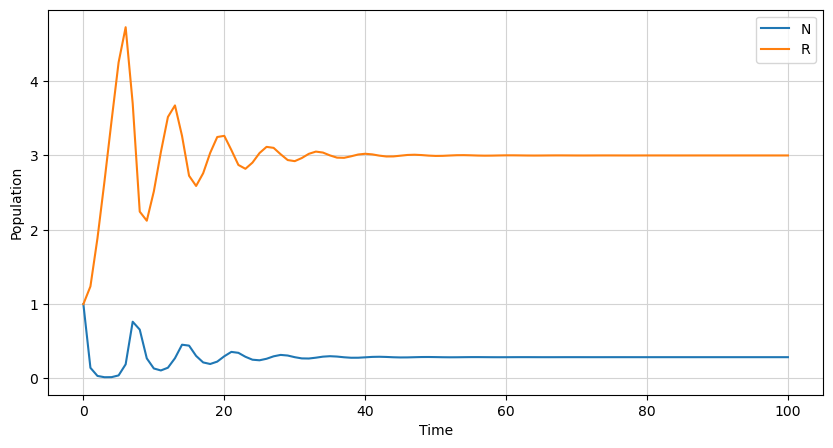

In [2]:
# define the ode CRM system function
def CRM_system(y, t, g, c, d, mu, ks):
    N, R = y
    Ndot = N * (g * c * R - d)
    Rdot = -c * N * R + mu * R / (ks + R)
    return [Ndot, Rdot]

# Initial values of N and R
initial_state = [1., 1.]  

# Define the parameters
g = 1
c = 1
d = 3
mu = 1
ks = 0.5

t = np.linspace(0, 100, 101)  

# Solve, extract the results for N and R
result = odeint(CRM_system, initial_state, t, args=(g, c, d, mu, ks))
N, R = result.T

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(t, N, label='N')
plt.plot(t, R, label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(color='lightgrey')
plt.show()


##### low $\mu$
The population is zero for most of the time, the resource grows.

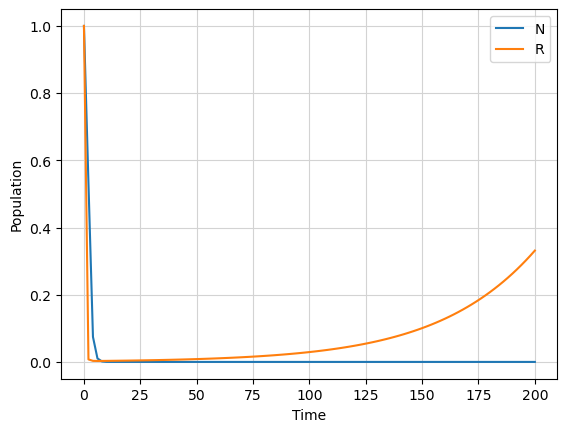

In [4]:
# Define the parameters
g = 2
c = 2
d = 1
mu = 0.1
ks = 4

t = np.linspace(0, 200, 101)  

# Solve  ODE, extract the results for N and R
result = odeint(CRM_system, initial_state, t, args=(g, c, d, mu, ks))
N, R = result.T

# Plot the results
plt.figure()
plt.plot(t, N, label='N')
plt.plot(t, R, label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(color='lightgrey')
plt.show()

##### very low death rate but high ks
There is a sort of tradeoff between 2 parameters, $\gamma$ and d.

It is expensive to increase the population because of the high $\gamma$ coefficient ($\sim$ number of units of nutrient that are consumed to produce one bacterium), but the death rate is very low.

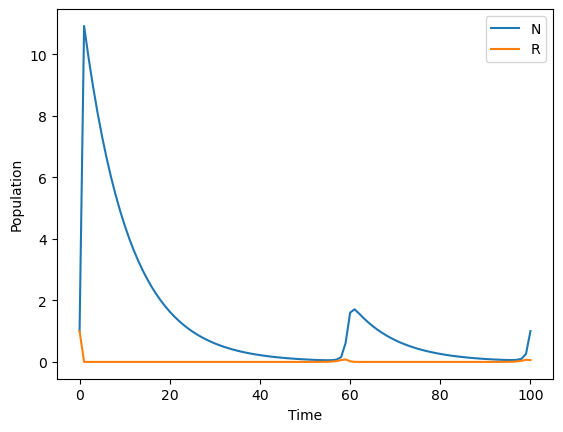

In [5]:
# Define the parameters
g = 10
c = 2
d = 0.1
mu = 2
ks = 2

t = np.linspace(0, 100, 101)  

# Solve  ODE, extract the results for N and R
result = odeint(CRM_system, initial_state, t, args=(g, c, d, mu, ks))
N, R = result.T

# Plot the results
plt.figure()
plt.plot(t, N, label='N')
plt.plot(t, R, label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

### Quasi-stationary solution and comparison

##### high death rate, low $\mu$ and ks
Both population and the resource oscillate in time, the QSA approximation is simalar to the average population.

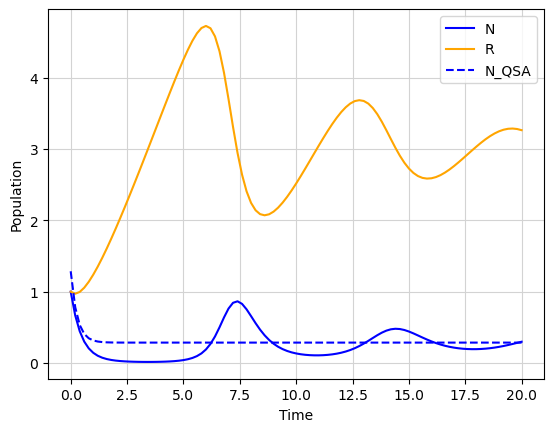

In [6]:
def qsa_crm(params, t):
    g, c, d, mu, ks = params  
    x = (np.exp(-d*t - c*ks*t*g + t*(d + c*ks*g))*g*mu) / (d + c*ks*g) + np.exp(-d*t - c*ks*t*g)
    return x

g = 1
c = 1
d = 3
mu = 1
ks = 0.5

#Quasi stationary approximation
parameters = (g, c, d, mu, ks)
t = np.linspace(0, 20, 101)  
x_qsa = qsa_crm(parameters, t)

#Consumer resource numerical solution
result = odeint(CRM_system, initial_state, t, args=(g, c, d, mu, ks))
N, R = result.T

# Plot the results
plt.figure()
plt.plot(t, N, label='N', color='blue')
plt.plot(t, R, label='R', color='orange')
plt.plot(t, x_qsa, label='N_QSA', color='blue', linestyle = 'dashed')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(color='lightgrey')
plt.show()

##### low $\mu$
The population is zero for most of the time, the resource grows. After a certain amount of time also the QSA reaches the value of the population.

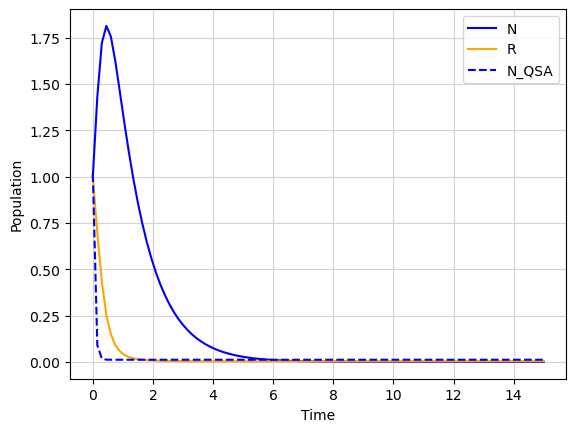

In [7]:
g = 2
c = 2
d = 1
mu = 0.1
ks = 4

#Quasi stationary approximation
parameters = (g, c, d, mu, ks)
t = np.linspace(0, 15, 101)  
x_qsa = qsa_crm(parameters, t)

#Consumer resource numerical solution
result = odeint(CRM_system, initial_state, t, args=(g, c, d, mu, ks))
N, R = result.T

# Plot the results
plt.figure()
plt.plot(t, N, label='N', color='blue')
plt.plot(t, R, label='R', color='orange')
plt.plot(t, x_qsa, label='N_QSA', color='blue', linestyle = 'dashed')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(color='lightgrey')
plt.show()

##### High $\gamma$ and death rate

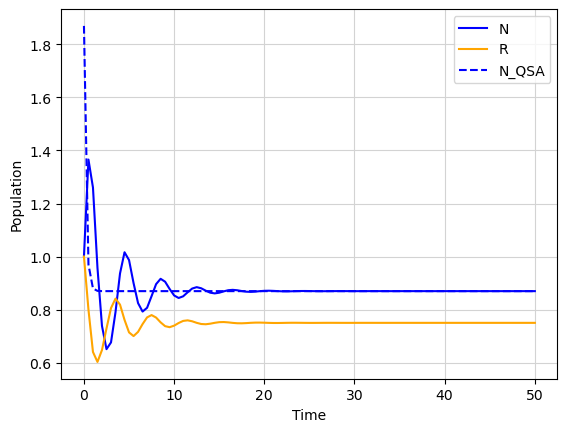

In [13]:
g = 4
c = 1
d = 3
mu = 1
ks = 0.4

#Quasi stationary approximation
parameters = (g, c, d, mu, ks)
t = np.linspace(0, 50, 101)  
x_qsa = qsa_crm(parameters, t)

#Consumer resource numerical solution
result = odeint(CRM_system, initial_state, t, args=(g, c, d, mu, ks))
N, R = result.T

# Plot the results
plt.figure()
plt.plot(t, N, label='N', color='blue')
plt.plot(t, R, label='R', color='orange')
plt.plot(t, x_qsa, label='N_QSA', color='blue', linestyle = 'dashed')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(color='lightgrey')
plt.show()